## Student Info

* Student name: Châu Tấn Kiệt
* Student ID: 21127329

## Project Info

This project aims to get hands-on experience in implementing some Classification and clustering algorithms taught in Data Mining and Applications course.

There are 2 exercises in this project:
* Binary classification using Decision Tree (ID3 algorithm)
* Data clustering with K-means clustering

## Instructions

### How to finish

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```Your answer here``` in text cells.


<font color='red'>**NOTE:**</font>

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

- The given test cases (if any) are used to only assist your code debugging / unit testing. Passing these test cases does not necessarily mean you will get the maximum point for the exercise.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID.ipynb` (e.g. `21120123.ipynb`) and submit on Moodle.

<font color=red>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points!!!</font>


## Exercise 1: Classification (6 points)

### Requirements

You will need to implement Decision Tree algorithm (ID3) in Python language.

**Description**:

- In this exercise, you only need to build a decision tree model using categorical attributes (no need to handle numerical attributes). You may transform numerical attributes into categorical before feeding into classification model.

- A sample belongs to either one of the given labels (binary classification).

- Dataset: [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) and [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing)


You will need to implement `load_data` function and DecisionTree class with the following methods:

- ```fit```: build tree from given dataset, using ID3 algorithm

- ```predict```: make predictions on new data points using the trained decision tree

- ```visualize```: plot trained decision tree from training dataset. You may choose how to visualize the trained model, as long as the tree structure of the model is clarified (you may use available visualization packages such as ```tree``` or ```graphviz```, or implement the visualization code yourself). For example, a simple representation of a decision tree built from [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset may look like:


```
outlook = sunny
|  humidity = high: no
|  humidity = normal: yes
outlook = overcast: yes
outlook = rainy
|  windy = TRUE: no
|  windy = FALSE: yes
```

**Note**:

- For [tennis.txt](https://drive.google.com/file/d/1jv67IlMIxGxwGGaP47AZ_1t3mxIn82Y7/view?usp=sharing) dataset, you can use all samples for training without spliting into train and test set. For [titanic2.txt](https://drive.google.com/file/d/1IwOxcPz-Hq1_JOOfGylJxy1TYhDvfEsg/view?usp=sharing) dataset, you may need to split into train/test with the ratio of 80/20 (use ```sklearn.model_selection.train_test_split``` with ```random_state=520``` for reproducibility)

- ```load_data``` function and ```DecisionTree``` class must be implemented once only and be usable for different datasets

- For each dataset, you need to ```load_data``` from input files, ```fit``` train dataset into model, use the trained model to ```predict``` on ```X_train``` and ```X_test``` (if any), calculate accuracy (use ```sklearn.metrics.accuracy_score```), and eventually ```visualize``` trained model

### Implementation (6 points)

In [41]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [42]:
# 1
### Description: data loading and categorization (if any)

def load_data(file_path: str, split: bool = True):
    """
    Load data from file_path and return numpy data

    Parameters
    ----------
    file_path : str
        The path of input data file (tab separated).
    split : bool
        Whether or not to return test set.

    Returns
    ----------
    (X_train, y_train)
    
    : training numpy array if split = False, else
    (X_train, y_train), (X_test, y_test): training and testing numpy array if split = True
    """
    # YOUR CODE HERE
    df = pd.read_csv(file_path, sep = '\t')

    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

    if split:
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=520)
        return X_train, y_train, X_test, y_test
    else:
        return X, y
    raise NotImplementedError()

Some helper functions for decision tree model:

In [43]:
def entropy(division):
    classes = set(division)
    entropy = 0
    for class_name in classes:
        prop = len(division[division == class_name]) / len(division)
        if prop != 0:
            entropy += prop * np.log2(prop)
    return -entropy

def entropy_attribute(X_train, y_train, column_idx: int):
    samples = X_train[:,column_idx]
    n_samples = len(samples)
    classes = set(samples)
    result = 0
    for class_name in classes:
        y_sub = y_train[samples == class_name]
        entropy_att = entropy(y_sub)
        result += (len(y_sub) / n_samples) * entropy_att
    return result

def find_best_split(X_train, y_train, except_col=None):
    min_entropy = 1
    maxIdx = -1
    for column_idx in range(len(X_train[0])):
        if except_col == column_idx: continue
        entropy = entropy_attribute(X_train, y_train, column_idx)
        if min_entropy > entropy:
            maxIdx = column_idx
            min_entropy = entropy
    return maxIdx

def majority_voting(y_train, val, col_idx):
    classes = set(y_train)
    max_freq = 0
    value = None
    for class_name in classes:
        freq = len(y_train[y_train == class_name])
        if freq > max_freq:
            max_freq = freq
            value = class_name
    leaf = {'val': value, 'col_idx': None, 'children': None}
    return {'val': val, 'col_idx': col_idx, 'children': [leaf]}

def infinity_check(X_train, y_train, classes):
    cnt = 0
    for class_name in classes:
        y_sub = y_train[X_train == class_name]
        if len(y_sub) == len(y_train):
            cnt += 1
    return cnt == len(classes)

In [44]:
# 4

# Decision Tree class
# You should implement the ID3 algorithm here
# You can add other utility methods to make your code easy to read :) 

class DecisionTree:
    def __init__(self):
        self.node = {}
        self.depth = 0

    def fit(self, X_train, y_train, val=None, col_idx=None):
        # 3
        # YOUR CODE HERE
        # Stop condition: All samples have the same label => Return leaf node
        if np.all(y_train == y_train[0]):
            leaf = {'val': y_train[0], 'col_idx': None, 'children': None}
            return {'val': val, 'col_idx': col_idx, 'children': [leaf]}

        column_idx = find_best_split(X_train, y_train, col_idx)
        classes = set(X_train[:,column_idx])
        node = {'val': val, 'col_idx': column_idx, 'children': []}

        if infinity_check(X_train[:,column_idx], y_train, classes):
            return majority_voting(y_train, val, col_idx)

        for class_name in classes:
            X_sub = X_train[X_train[:,column_idx] == class_name]
            y_sub = y_train[X_train[:,column_idx] == class_name]
            node['children'].append(self.fit(X_sub, y_sub, class_name, column_idx))

        self.node = node
        self.depth += 1
      
        return node
        raise NotImplementedError()

    def predict(self, X_test):
        # 0.5
        # YOUR CODE HERE
        predict = ['' for _ in range(len(X_test))]
        for i, row in enumerate(X_test):
            predict[i] = self._predict(row)
        return predict
        raise NotImplementedError()

    def _predict(self, row):
        cur_layer = self.node
        while cur_layer['children'] is not None:
            for node in cur_layer['children']:
                if node['children'] is None: 
                    return node['val']
                if node['val'] == row[cur_layer['col_idx']]:
                    cur_layer = node
                    break

    def visualize(self, root, column_names, n_tabs=0):
        # 0.5
        # YOUR CODE HERE
        tab = '\t' * n_tabs
        value = root['children'][0]['children'][0]['val']
        all_the_same = True
        for node in root['children']:
            if value != node['children'][0]['val'] or len(node['children']) > 1:
                all_the_same = False
                break
        if all_the_same:
            print(f": {value}")
            return
        if n_tabs: print('')
        for node in root['children']:
            if tab != '':
                for t in tab:
                    print('|' + t, end='')
            print(f"{column_names[root['col_idx']]} = {node['val']}", end='')
            if node['children'][0]['col_idx'] is None:
                print(f": {node['children'][0]['val']}")
            else:
                self.visualize(node, column_names, n_tabs + 1)

In [45]:
df = pd.read_csv("data/tennis.txt", sep="\t")
column_names = np.array(df.columns)

In [46]:
# 0.5 = 0.25 (tennis dataset) + 0.25 (titanic2 dataset) 

### NOTE: Flow to run your code (do this for all your datasets)

# dataset 1 (create one cell for each dataset with the following content)

tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/tennis.txt")
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
print(f'Accuracy on the training dataset: {acc_train}')
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
print(f'Accuracy on the testing dataset: {acc_test}')
# tree.visualize()
tree.visualize(tree.node, df.columns)


Accuracy on the training dataset: 1.0
Accuracy on the testing dataset: 0.3333333333333333
outlook = rain
|	wind = weak: yes
|	wind = strong: no
outlook = overcast: yes
outlook = sunny: no


In [47]:
df = pd.read_csv("data/titanic2.txt", sep="\t")
column_names = np.array(df.columns)

In [48]:
tree = DecisionTree()
X_train, y_train, X_test, y_test = load_data("data/titanic2.txt", split=True)
tree.fit(X_train, y_train)
y_hat_train = tree.predict(X_train) 
acc_train = accuracy_score(y_train, y_hat_train)
print(f'Accuracy on the training dataset: {acc_train}')
y_hat_test = tree.predict(X_test) 
acc_test = accuracy_score(y_test, y_hat_test)
print(f'Accuracy on the testing dataset: {acc_test}')
tree.visualize(tree.node, column_names)
# tree.visualize(tree.node, column_names)


Accuracy on the training dataset: 0.7914772727272728
Accuracy on the testing dataset: 0.7868480725623582
sex = female
|	pclass = crew: yes
|	pclass = 3rd: no
|	pclass = 2nd: yes
|	pclass = 1st: yes
sex = male
|	pclass = crew: no
|	pclass = 3rd: no
|	pclass = 2nd
|	|	age = child: yes
|	|	age = adult: no
|	pclass = 1st
|	|	age = child: yes
|	|	age = adult: no


### Answer the following question (0.5 points)

**Question 1:** Your comments on the accuracy scores between train and test sets on ```titanic2``` dataset? Elaborate, explain and propose a solution

---

*Your answer here*

- The accuracy scores on the training set and test set are relatively close to each other. This shows the decision tree model is not overfitting to the training data.
- Given there are three attributes (class, age, and gender), it is possible that there are several samples with the same feature values but different class labels. Therefore, I use majority voting to assign class labels to samples with the same feature values, which is a common approach when building decision tree models. With roughly 79% accuracy, the model should be able to correctly classify a majority of the samples in the dataset.
- We can improve this decision tree model by adding passenger details. This extra data will make the predictions clearer and reduce ambiguity, potentially eliminating the need for less accurate majority voting at the decision stage.



## Exercise 2: Clustering (4 points + 1 bonus point)

### Requirements

In this exercise, you will need to implement K-means clustering algorithm on synthetic data.

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist

**Dataset:**

- The synthetic dataset contains 1500 data points that belong to 3 clusters. The clusters' centers are respectively $(2,2), (7,3), (3,6)$. 

- Data points of each cluster are generated randomly from the bivariate normal distribution

In [50]:
seed = 520 # for reproducibility

In [51]:
### Description: generate synthetic data

def generate_data(means, cov, N, K):
    np.random.seed(seed) 
    X0 = np.random.multivariate_normal(means[0], cov, N)
    X1 = np.random.multivariate_normal(means[1], cov, N)
    X2 = np.random.multivariate_normal(means[2], cov, N)

    X = np.concatenate((X0, X1, X2), axis = 0)
    original_label = np.asarray([0]*N + [1]*N + [2]*N).T

    return X, original_label


# visualize data 
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]
    
    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

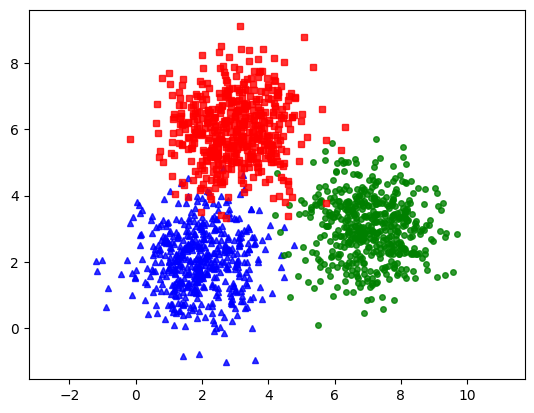

In [52]:
N, K = 500, 3
means = [[2, 2], [7, 3], [3, 6]]
cov = [[1, 0], [0, 1]]

X, original_label = generate_data(means, cov, N, K)
kmeans_display(X, original_label)

You will need to fill in the ```YOUR CODE HERE``` to finish K-means clustering algorithm

### Implementation (4 points)

In [53]:
# 0.5
def kmeans_init_centers(X, k):
    np.random.seed(seed)

    # randomly pick k rows of X as initial centers using np.random.choice function
    
    # YOUR CODE HERE
    index = np.random.choice(len(X), k, replace=False)
    centers = X[index, :]
    return centers
    raise NotImplementedError()

In [54]:
centers = kmeans_init_centers(X, K)
assert centers.shape == (K, 2)

In [55]:
# 1
def kmeans_assign_labels(X, centers):
    # calculate pairwise distances between data and centers using cdist
    # return index of the closest center using np.argmin
    # YOUR CODE HERE
    distances = cdist(X, centers ,'euclidean')
    labels = np.array([np.argmin(i) for i in distances])
    return labels
    raise NotImplementedError()

In [56]:
assigned_labels = kmeans_assign_labels(X, centers)
assert assigned_labels.shape == (N*3, )

In [57]:
# 1
def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K):
        # collect all points assigned to the k-th cluster 
        # take average

        # YOUR CODE HERE
        temp_center = X[labels==k].mean(axis=0) 
        centers[k] = temp_center 
    centers = np.vstack(centers)
    return centers
    raise NotImplementedError()

In [58]:
# 0.5
def has_converged(centers, new_centers):
    # return True if two sets of centers are the same

    # YOUR CODE HERE
    return np.allclose(centers, new_centers)
    raise NotImplementedError()

In [59]:
# 1
def kmeans(X, K):
    # save the center coordinates of each iteration
    centers = [kmeans_init_centers(X, K)]  
    # save the labels of each iteration
    labels = []
    it = 0 
    while True:
        # at each iteration:
        # 1. assign label for each points and append to labels
        # 2. update the centers
        # 3. check the convergence condition
        #    and append NEW center coordinates to centers
        # 4. update iteration 

        # YOUR CODE HERE
        labels.append(kmeans_assign_labels(X, centers[it]))
        centers.append(kmeans_update_centers(X, labels[it], K))
        if has_converged(centers[it], centers[it+1]):
            break
        it += 1
    
    return (centers, labels, it)
    raise NotImplementedError()


Centers found by k-means algorithm:
[[2.96402177 6.01105837]
 [7.03594941 3.05108601]
 [1.92067563 2.03188976]]


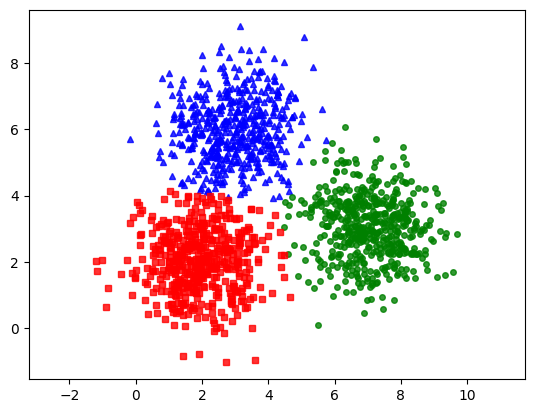

In [60]:
(centers, labels, it) = kmeans(X, K)
print('Centers found by k-means algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

### Answer the following questions (bonus 1 point)

**Question 2:** Your comments on the result of K-means algorithm on the synthetic dataset? (0.25)

---

*Your answer here*
- The algorithm appears to have identified three well-separated clusters in the red, green, and blue areas.
- The clusters are roughly circular, which is a good fit for K-means, which works well with spherical clusters.
- Looking at the result, the data points are distributed in a seperated manner, making it easier to see the grouping.

**Question 3:** 

+ Drawbacks of K-means clustering algorithm (0.5)

+ Propose solutions to the drawbacks you stated above (0.25)

---

*Your answer here*
+ Drawbacks of K-means clustering algorithm (0.5)
    - Determine the number of k. Choosing the wrong k can lead to inaccurate results.
    - The time complexity of the algorithm is O(n * K * M * D), with K is the number of clusters, n is the number of data points, D is the number of dimensions, and M is the number of iterations. So, even moderately large datasets can be challenging to handle if they’re high-dimensional.
    - Sensitive with outliers, centroids can be dragged by outliers, or outliers might get their own cluster instead of being ignored. Needs careful preprocessing
+ Propose solutions to the drawbacks you stated above (0.25)
    1. Determining the Optimal Number of Clusters (K):
        - Elbow Method: This heuristic approach involves calculating the total within-cluster sum of squared errors (WCSS) for different values of K. The "elbow" in the plot of WCSS vs. K suggests the optimal number of clusters where adding more clusters doesn't significantly reduce WCSS.
        - Silhouette Analysis: Evaluates how well each data point is assigned to its cluster. It considers both the average distance to points in its own cluster (a) and the average distance to points in the closest neighboring cluster (b). A high silhouette coefficient (closer to 1) indicates good clustering.
        - Gap Statistic: Compares the within-cluster dispersion of data points to an expected value under a null hypothesis of random clustering. It identifies the K that maximizes the gap between the actual and expected WCSS.
        - Domain Knowledge: Incorporate understanding of the data to guide your choice of K. For example, if you know the data naturally forms into 3 or 4 groups, use that information.

    2. Handling High Dimensionality:
        - Dimensionality Reduction Techniques: Reduce the number of features using Principal Component Analysis (PCA) or other techniques to capture the most variance in the data. This can improve cluster separation and reduce computational cost.
        - Locality-Sensitive Hashing (LSH): This method approximates distances in high-dimensional space more efficiently, allowing K-means to function better with a larger number of dimensions.

    3. Dealing with Outliers:
        - Preprocessing: Consider outlier detection and removal techniques like IQR (Interquartile Range) filtering or robust scaling to mitigate their influence on centroids.\
        - Robust K-means Variants: Explore K-means variations designed to be less sensitive to outliers, such as K-medians (uses medians instead of means) or K-medoids (uses medoids, which are actual data points within clusters).


